#### Nicolás García Gómez - DS 61

# Proyecto 04 - Procesamiento del Lenguaje Natural - Segunda Parte

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

## ETAPAS

### 1-Exploración de datos

### 2-Procesamiento del Lenguaje Natural - NLTK

### 3- Vectorización

### 4-Machine Learningv - Modelado




In [239]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter # para dar formato de porcentaje a las tablas de frecuencia
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

## 1. Exploración del dataset - EDA

In [240]:
Amazon_train = pd.read_json('dataset_es_train.json', lines=True) # para abir un archivo tipo JSON
Amazon_train.head()
Amazon_train.shape

(200000, 8)

In [241]:
Amazon_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [242]:
# revisamos los valores únicos de cada una de las columnas del data set. 
for col in Amazon_train.columns:
    print(col, len(Amazon_train[col].unique()), 'valore diferentes')

review_id 200000 valore diferentes
product_id 150938 valore diferentes
reviewer_id 179076 valore diferentes
stars 5 valore diferentes
review_body 198264 valore diferentes
review_title 112114 valore diferentes
language 1 valore diferentes
product_category 30 valore diferentes


In [243]:
Amazon_train.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

- **Mantenemos las columnas** 
  - Stars
  - Review body
  - Review title
  - Product Category

In [244]:
Amazon_train.drop(['review_id','product_id','reviewer_id','language'], axis=1, inplace= True)

In [245]:
Amazon_train.head()

,stars,review_body,review_title,product_category
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes


- **Revisamos el largo en cantidad de caracteres de las diferentes reviews**

In [246]:
Amazon_train['length']= Amazon_train['review_body'].apply(len)

In [247]:
#Aplicamos .describe() a las dos variables núnmericas
Amazon_train.describe()

,stars,length
count,200000.000000,200000.000000
mean,3.000000,151.302910
std,1.414217,132.201785
min,1.000000,16.000000
25%,2.000000,68.000000
50%,3.000000,120.000000
75%,4.000000,186.000000
max,5.000000,3086.000000


Como se observa en la tabla podemos ver que, 
 - El 50% de las reviews tienen menos de 120 caracteres
 - El 75% de las reviews tienen menos de 186 caracteres

In [248]:
#quito las reviews de más de 186 caracteres y redujo el data set a 150.385 registros, es decir nos quedamos con el 75% de las reviews del set de datos
Amazon_train=Amazon_train[Amazon_train.length<=186]

In [249]:
Amazon_train.sort_values('length',ascending=False).head()

,stars,review_body,review_title,product_category,length
36282,1,Extremadamente pequeño. Cuando me llegó la caj...,Muy pequeño,pet_products,186
33304,1,Lo he probado varias veces. Con o sin lubrican...,Francamente una decepcion,drugstore,186
178941,5,"Porque me ha encantado, se puede lavar. Con es...",Corrector de postura,personal_care_appliances,186
61982,2,Las pegatinas no tienen la suficiente fuerza p...,Poca adherencia,home,186
49490,2,El artículo sería genial sino es que a los 5 d...,Producto defectuoso,toy,186


In [250]:
Amazon_train.shape

(150385, 5)

Graficamos algunas variables para visualizar su compartamiento
 - Agrupamiento de cantidad de reviws según categorias de stars => aca vemos una distribución homogenea y muy pareja pero no exacta como cuando tomamos el 100% del set Amazon_train que teníamos 40K de reviews en cada categoría de estrellas como sucedio en el 'Proyecto 3'
 - Distribución de la variable length en un histograma  => aca se observa que luego del lenght entre 120-120 la cantidad de reviews de largos mayores comieza a desender. Como se mencion´+o antes el 50% de las reviews tienen largos igual o menos a 120.
 - Distribución de la variable lenght por categoria de estrella usando boxplots => similar al agrupamiento de review por catidad de estrellas se observa un compartamiento muy regular por categoría de estrella

Agrupamiento de review por cantidad de estrellas

   stars  Cantidad_ reviews_x_estrella
4      5                         31721
3      4                         31130
0      1                         29805
2      3                         29707
1      2                         28022



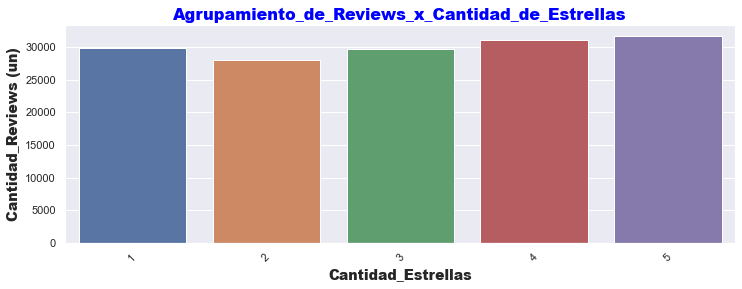

<Figure size 432x288 with 0 Axes>

In [251]:
print('Agrupamiento de review por cantidad de estrellas')
print('')
print(Amazon_train.groupby(['stars']).size().reset_index(name='Cantidad_ reviews_x_estrella').sort_values('Cantidad_ reviews_x_estrella',ascending=False))

#Armamos grafico en Seaborn para acompañar a la tabla de agrupamiento del punto anterior
print('')
plt.figure(figsize=(12, 4))

ax=sns.countplot( x = 'stars',data = Amazon_train)

plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.ylabel('Cantidad_Reviews (un)',fontweight= "black", fontsize = 14)
plt.xlabel('Cantidad_Estrellas',fontweight= "black", fontsize = 14)
plt.title('Agrupamiento_de_Reviews_x_Cantidad_de_Estrellas',fontweight= "black",fontsize = 16, color="blue")
#plt.legend(loc='lower center', shadow=False, fontsize='small')
#plt.grid()
plt.figure()
plt.show()

Text(0.5, 1.0, 'Distribución de la variable length')

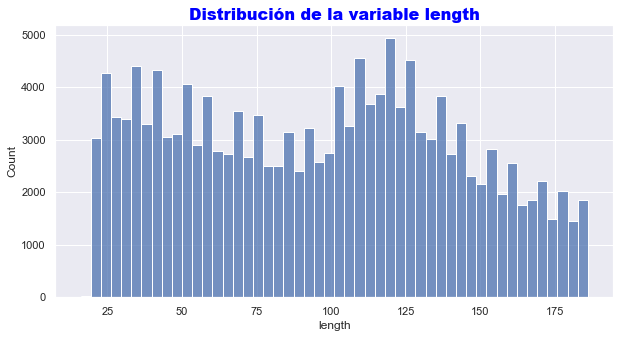

In [252]:
#Vemos la distribución de 'length'

plt.figure(figsize = (10,5))
sns.histplot(Amazon_train['length'], bins =50)
plt.title('Distribución de la variable length', fontweight= 'black',fontsize = 16,color="blue")

<AxesSubplot:xlabel='length'>

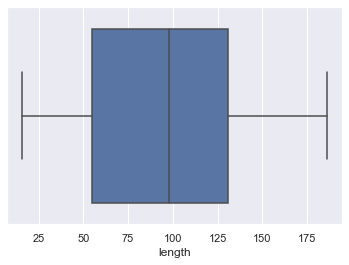

In [253]:
sns.boxplot(x ='length',data = Amazon_train, showfliers = False)

<AxesSubplot:xlabel='stars', ylabel='length'>

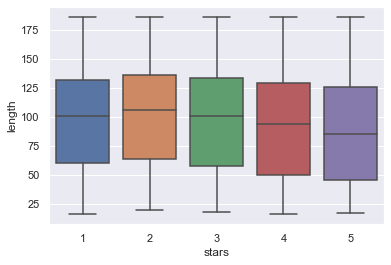

In [254]:
sns.boxplot(x ='stars' , y = 'length',data = Amazon_train, showfliers = False)

- **Análizamos las categorías**

- **Armamos la tabla de frecuencias** absolutas, relativas, acumuladas y un grafico de Pareto para las Categorías de producto => video: https://www.youtube.com/watch?v=NpEPEIMvItw

In [255]:
#Agrupamiento por product_category
frec = pd.value_counts(Amazon_train['product_category'])

#transformo en el df de poandas
df_frec= pd.DataFrame(frec)

#agrego columnas 'Frec_abs'
df_frec.columns = ['Frec_abs']

#calculo la coliumna 'Frec_abs'
df_frec['Frec_rel_%'] = 100* (df_frec.Frec_abs / Amazon_train.shape[0])

#tabla de frecuencias absolutas / reltivas / acumulada

frec_rel_val= df_frec['Frec_rel_%'].values # es una lista que contiene los valores de frec_rel_%

acum = []
valor_acum = 0

for i in frec_rel_val:
    valor_acum = valor_acum + i 
    acum.append(valor_acum)

df_frec['frec_rel_%_acum'] = acum
df_frec.head(15) # son las 15 categorías que acumulan el 80% de las review

,Frec_abs,Frec_rel_%,frec_rel_%_acum
home,20829,13.850451,13.850451
wireless,18719,12.447385,26.297836
toy,10691,7.109087,33.406922
sports,9978,6.634970,40.041892
home_improvement,8276,5.503208,45.545101
pc,7714,5.129501,50.674602
electronics,7330,4.874156,55.548758
beauty,5660,3.763673,59.312431
automotive,5651,3.757689,63.070120
apparel,4834,3.214416,66.284536


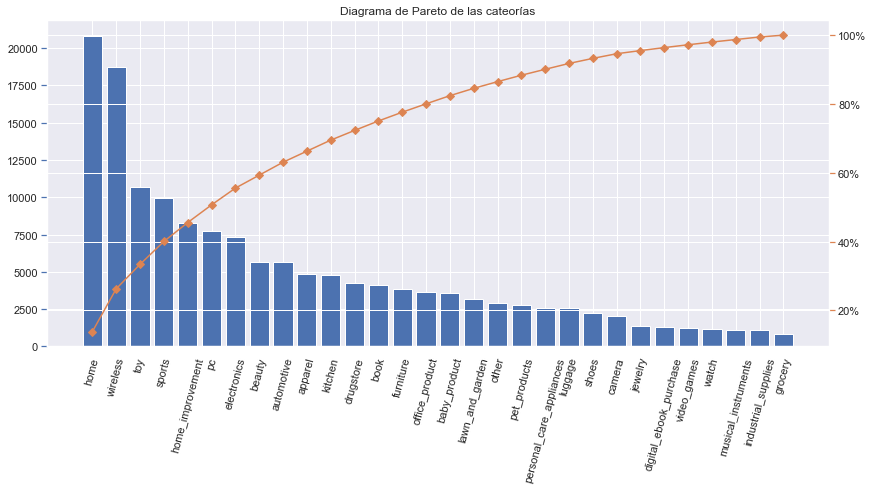

In [256]:
fig= plt.figure (figsize = (14,6))
ax= fig.add_subplot(1,1,1)

#Asignamos el titulo
ax.set_title ('Diagrama de Pareto de las cateorías')

#Creamos un grafico de barras con la frec_abs
ax.bar (df_frec.index, df_frec['Frec_abs'], color='C0')
        
    
#Graficamos la 'frec_rel_%_acum'
ax2 = ax.twinx() # generamos un nuevo eje
ax2.plot (df_frec.index, df_frec['frec_rel_%_acum'], color ='C1', marker='D', ms=5)
ax2.yaxis.set_major_formatter (PercentFormatter()) # para que los numeros del eje de la derecha esten en %

#Etiquetamos, asignamos color y damos rotación a las etiquetes de los ejes
ax.tick_params (axis='y', color = 'C0')
ax2.tick_params (axis='y', color = 'C1')
ax.set_xticklabels(df_frec.index, rotation=75)

plt.show()

Podemos concluir de las tablas y del pareto que, 
* El 80% de las review corresponden a 15 categorías =>  home, wireless, toy, sports, home_improvement, PC, electronics, beauty, automotive, apparel, kitchen, drugstore, book, furniture and office_products

Revisamos las cateogrías más populares por estrella tomando el top 15 de cada una y dejando las categorias unicas (17) al combinar el top 15 de las 5 categorías

In [257]:
# 5 estrellas
Amazon_train_5=Amazon_train[Amazon_train.stars ==5].groupby([ 'stars','product_category']).size().reset_index(name='Cantidad_reviews_x_categoría').sort_values('Cantidad_reviews_x_categoría',ascending=False)
# 4 estrellas
Amazon_train_4=Amazon_train[Amazon_train.stars ==4].groupby([ 'stars','product_category']).size().reset_index(name='Cantidad_reviews_x_categoría').sort_values('Cantidad_reviews_x_categoría',ascending=False)
# 3 estrellas
Amazon_train_3=Amazon_train[Amazon_train.stars ==3].groupby([ 'stars','product_category']).size().reset_index(name='Cantidad_reviews_x_categoría').sort_values('Cantidad_reviews_x_categoría',ascending=False)
# 2 estrellas
Amazon_train_2=Amazon_train[Amazon_train.stars ==2].groupby([ 'stars','product_category']).size().reset_index(name='Cantidad_reviews_x_categoría').sort_values('Cantidad_reviews_x_categoría',ascending=False)
# 1 estrellas
Amazon_train_1=Amazon_train[Amazon_train.stars ==1].groupby([ 'stars','product_category']).size().reset_index(name='Cantidad_reviews_x_categoría').sort_values('Cantidad_reviews_x_categoría',ascending=False)

In [258]:
comparativo_1 = pd.concat([Amazon_train_5.product_category.head(15),Amazon_train_4.product_category.head(15),Amazon_train_3.product_category.head(15),Amazon_train_2.product_category.head(15),Amazon_train_1.product_category.head(15)],axis=0).unique()

In [259]:
#categorías en el top 15 combinando las 5 categoría de estrellas => Categorías únicas
comparativo_1

array(['home', 'wireless', 'toy', 'sports', 'pc', 'home_improvement',
       'electronics', 'book', 'automotive', 'beauty', 'kitchen',
       'drugstore', 'office_product', 'baby_product', 'apparel',
       'furniture', 'lawn_and_garden'], dtype=object)

In [260]:
#tenemos 17 categorías a ver según la clasificación por estrella
comparativo_1.shape

(17,)

- Renombro las columnas para luego ordenarlas y saber inequivocamente a que categoría de estrellas pertenecen
- Luego se determino y armo una tabla con la cantidad y la frecuencia de las reviews por categoría de producto y por categoría de estrella 

In [261]:
# Renombro columnas

Amazon_train_5=Amazon_train_5.rename(columns={'product_category':'category_5','Cantidad_reviews_x_categoría':'Q_rev_cat_5'})
Amazon_train_4=Amazon_train_4.rename(columns={'product_category':'category_4','Cantidad_reviews_x_categoría':'Q_rev_cat_4'})
Amazon_train_3=Amazon_train_3.rename(columns={'product_category':'category_3','Cantidad_reviews_x_categoría':'Q_rev_cat_3'})
Amazon_train_2=Amazon_train_2.rename(columns={'product_category':'category_2','Cantidad_reviews_x_categoría':'Q_rev_cat_2'})
Amazon_train_1=Amazon_train_1.rename(columns={'product_category':'category_1','Cantidad_reviews_x_categoría':'Q_rev_cat_1'})

In [262]:
#genero data set por categoía que me sierven para el calculo de frecuencia. ya que necesito saber la cantidad de registros totales de cada categoría

Amazon_train_solo_5=Amazon_train[Amazon_train.stars==5]
Amazon_train_solo_4=Amazon_train[Amazon_train.stars==4]
Amazon_train_solo_3=Amazon_train[Amazon_train.stars==3]
Amazon_train_solo_2=Amazon_train[Amazon_train.stars==2]
Amazon_train_solo_1=Amazon_train[Amazon_train.stars==1]

In [263]:
# Chart comparativo de la cantidad y frecuencia de reviews en función de la cantidad de estrellas

comparativo_2 = pd.concat([Amazon_train_5.category_5.head(15),Amazon_train_5.Q_rev_cat_5.head(15)  
                           ,Amazon_train_4.category_4.head(15),Amazon_train_4.Q_rev_cat_4.head(15) 
                           ,Amazon_train_3.category_3.head(15),Amazon_train_3.Q_rev_cat_3.head(15) 
                           ,Amazon_train_2.category_2.head(15),Amazon_train_2.Q_rev_cat_2.head(15) 
                           ,Amazon_train_1.category_1.head(15),Amazon_train_1.Q_rev_cat_1.head(15)]
                          ,axis=1).sort_values(by=['Q_rev_cat_5','Q_rev_cat_4','Q_rev_cat_3','Q_rev_cat_2','Q_rev_cat_1'],ascending=False,na_position='last',ignore_index=True)

comparativo_2['Frec_rel_%_5'] = 100* round((comparativo_2.Q_rev_cat_5 / Amazon_train_solo_5.shape[0]),4)
comparativo_2['Frec_rel_%_4'] = 100* round((comparativo_2.Q_rev_cat_4 / Amazon_train_solo_4.shape[0]),4)
comparativo_2['Frec_rel_%_3'] = 100* round((comparativo_2.Q_rev_cat_3 / Amazon_train_solo_3.shape[0]),4)
comparativo_2['Frec_rel_%_2'] = 100* round((comparativo_2.Q_rev_cat_2 / Amazon_train_solo_2.shape[0]),4)
comparativo_2['Frec_rel_%_1'] = 100* round((comparativo_2.Q_rev_cat_1 / Amazon_train_solo_1.shape[0]),4)

comparativo_2= comparativo_2.rename(columns={'category_5':'CATEGORIA'})
comparativo_2.drop(['category_4','category_3','category_2','category_1'], axis=1, inplace= True)

comparativo_2.iloc[15,0]= 'furniture'
comparativo_2.iloc[16,0]= 'lawn_and_garden'


comparativo_2

,CATEGORIA,Q_rev_cat_5,Q_rev_cat_4,Q_rev_cat_3,Q_rev_cat_2,Q_rev_cat_1,Frec_rel_%_5,Frec_rel_%_4,Frec_rel_%_3,Frec_rel_%_2,Frec_rel_%_1
0,home,4185.0,4216.0,4215.0,4073.0,4140.0,13.19,13.54,14.19,14.54,13.89
1,wireless,3479.0,3462.0,3386.0,3855.0,4537.0,10.97,11.12,11.40,13.76,15.22
2,toy,2445.0,2126.0,2288.0,2000.0,1832.0,7.71,6.83,7.70,7.14,6.15
3,sports,1953.0,2235.0,2132.0,1778.0,1880.0,6.16,7.18,7.18,6.35,6.31
4,pc,1849.0,1724.0,1326.0,1300.0,1515.0,5.83,5.54,4.46,4.64,5.08
5,home_improvement,1691.0,1878.0,1635.0,1426.0,1646.0,5.33,6.03,5.50,5.09,5.52
6,electronics,1419.0,1458.0,1360.0,1385.0,1708.0,4.47,4.68,4.58,4.94,5.73
7,book,1368.0,914.0,735.0,NaN,NaN,4.31,2.94,2.47,NaN,NaN
8,automotive,1107.0,1158.0,1149.0,1011.0,1226.0,3.49,3.72,3.87,3.61,4.11
9,beauty,1090.0,1016.0,1214.0,1134.0,1206.0,3.44,3.26,4.09,4.05,4.05


De manera general se puede decir que al mirar la cantidad de review y la frecuencia de una misma categoría de producto la cantidad y frecuencia de las mismas para las diferentes clasificaciones de cantidad de estrellas se mantiene dentro de rango similares y proximos. Lo cual sigue demostrando que según este análisis tenemos un data set bastante balanceado para las reviews de largo <= 186 caracteres

## 2.NLTK

## 2.1 NORMALIZACIÓN
- 2.1.0 Trabajamos sobre las 'Stops Words'
- 2.1.1 'corro las fuciones clean_text_round1 y clean_text_round2'
- 2.1.2 'pasamos texto a minuscula' 
- 2.1.3 'tokenizar' 
- 2.1.4 'limpiar caracteres'
- 2.1.5 'quitar acentos'
- 2.1.6 'quitar stopwords' 
- 2.1.7 'quito palabas con menos de tres caracteres'
- 2.1.8 Llevamos las palabras a su raíz

In [ ]:
import nltk # librería para NLP
#Para configurar NLTK. 
nltk.download('punkt')
nltk.download('stopwords') # aca descargamos las stop words, una lista predefinida de la librería
from nltk.corpus import stopwords
import re# Importamos esta libreria que nos permite reemplzar caracteres
import string

 - **Función de eliminación de acentos**

In [265]:
#funci+on para eliminación de acentos

def eliminar_acentos(string):
    """
    DESCRIPCION: Eliminar acentos de una cadena de texto
    PARAMS:
    * string (string): Cadena de texto
    RETURN:
    * Cadena de texto sin acentos
    """
    trans = str.maketrans('ÁÉÍÓÚÜáéíóúü','AEIOUUaeiouu')
    return string.translate(trans)

### - **2.1.0 Trabajamos sobre las 'Stops Words'**

In [266]:
#Stopswords en español, no hay mayusculas y si hay acentos... 
stopwords = set(nltk.corpus.stopwords.words('spanish'))
stopwords = nltk.corpus.stopwords.words('spanish') # lo transformo en una lista de np

In [267]:
#quito los acentos en mi lista de stopswords y me aseguro de que todo este en minuscula
stopwords_modificada = []
for i in range (len(stopwords)):
    stop= stopwords[i]
    stop=stop.lower()
    stop= nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(stop)# Tokeniza
    stop= [eliminar_acentos(w) for w in stop]
    stopwords_modificada.append(stop)
stopwords_modificada = list(itertools.chain(*stopwords_modificada))

In [268]:
len (stopwords_modificada)

313

### - **2.1.1 'corro las fuciones clean_text_round1 y clean_text_round2'**
Función que remueve texto entre corchetes, elimina los signos de puntuación y las palabras que contengan números tanto el title como en body





In [269]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
  
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

In [271]:
#Renombramos las columnas

Amazon_train=Amazon_train.rename(columns={'review_title':'title','review_body':'body', 'product_category':'category'})

In [272]:
Amazon_train['body'] = Amazon_train['body'].apply(lambda x: clean_text_round1(x))

In [273]:
Amazon_train['body']= Amazon_train['body'].apply(lambda x: clean_text_round2(x))

### BODY

- **2.1.2 'pasamos texto a minuscula'** 
- **2.1.3 'tokenizar'** 
- **2.1.4 'limpiar caracteres'**
- **2.1.5 'quitar acentos'**
- **2.1.6 'quitar stopwords'** 
- **2.1.8 Llevamos las palabras a su raíz**
    - Stemming => Snowballstemmer

### - **Utilizamos SnowballStemmer**

In [274]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='spanish')

### - BODY

In [275]:
Amazon_train_stem = []
bow_train_stem = []

for i in range(Amazon_train.shape[0]):
    token= Amazon_train.iloc[i].body
    token=token.lower()#pasamos texto a miniscula.
    token=re.sub("[^a-zA-Z]"," ",str(token))# Vamos a reemplzar los caracteres que no sean letras por espacios
    token= nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(token)# Tokeniza
    token=  [eliminar_acentos(w) for w in token] # quito acentos
    token=  [w for w in token if w not in stopwords_modificada] # Filtrar por stopwords
    token = [w for w in token if len(w)>3]
    
    token = [stemmer.stem(w) for w in token]# Aplicamos el Lemmatizer

    bow_train_stem.append(token)
    
    token=" ".join(token)# Por ultimo volvemos a unir la review
    
    Amazon_train_stem.append(token) 

In [276]:
# ejemplo de las primeras 3 review, tokenizadas, sin stopwors y sin acentos
print(Amazon_train_stem [0])
print(Amazon_train_stem [1])
print(Amazon_train_stem [2])

buen pantall men mes recib respuest fabric
horribl compr sab ingl inform tic despu hor capaz instal
oblig compr unidad lleg sol form reclam autent estaf compreis


In [277]:
len(bow_train_stem)

150385

In [278]:
# Esta celda convierte una lista de listas en una unica lista. Podemos decir que obtenemos el ´BAG OF WORDS´ (no olvidar tiene palabras repetidas, no son únicas)
bow_train_stem = list(itertools.chain(*bow_train_stem))

In [279]:
#cantidad totales de palabras del BOW => 1.153.006. El BAG del 'Proyecto 3 tenía =>2.898.536 palabras (se redujo en un 40%)'
len(bow_train_stem)

1153006

In [280]:
# Frecuencia de repetición de las palabras dentro de la BOW
freq_bow_train_stem = nltk.FreqDist(bow_train_stem)
freq_bow_train_stem

FreqDist({'bien': 32124, 'buen': 27207, 'calid': 21127, 'lleg': 16084, 'compr': 15471, 'preci': 15198, 'product': 14502, 'perfect': 13095, 'funcion': 12685, 'gust': 10021, ...})

In [281]:
freq_bow_train_stem_df= pd.DataFrame(list(freq_bow_train_stem.items()), columns=['Word', 'Frequency']).sort_values('Frequency',ascending=False).reset_index(drop = True)
freq_bow_train_stem_df.head()

,Word,Frequency
0,bien,32124
1,buen,27207
2,calid,21127
3,lleg,16084
4,compr,15471


In [282]:
#BAG OF WORDS: 16.205 únicas
freq_bow_train_stem_df.shape

(16205, 2)

**Con la aplicación del stemmer vemos**
 - Body =>


In [283]:
#Comparamos el title y body con stemmer y sin stemmer para ver su efecto.

Amazon_train['body_stem'] = Amazon_train_stem # Agregamos la columna 'body_stem' al set 'Amazon_train' con los valores existentes en 'Amazon_train_stem'

Amazon_train[['body','body_stem']].head()

,body,body_stem
0,nada bueno se me fue ka pantalla en menos de ...,buen pantall men mes recib respuest fabric
1,horrible nos tuvimos que comprar otro porque ...,horribl compr sab ingl inform tic despu hor ca...
2,te obligan a comprar dos unidades y te llega s...,oblig compr unidad lleg sol form reclam autent...
4,llega tarde y co la talla equivocada,lleg tard tall equivoc
5,jamás me llegó y el vendedor nunca contacto co...,lleg vendedor nunc contact conmig pes intent vec


## 3. VECTORIZACIÓN

 - Para BODY tomamos un max feature de 1000

In [286]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_B=TfidfVectorizer(max_features=1000, min_df= 5) # stop_words="english" , ngram_range=(1, 2)

### - BODY

In [287]:
vectorizer_B

TfidfVectorizer(max_features=1000, min_df=5)

In [288]:
vector_b= list(Amazon_train['body_stem'].values)
stars_b = Amazon_train['stars']

In [289]:
matriz_body = vectorizer_B.fit_transform(vector_b)

# Tomamos las palabras
all_words_b = vectorizer_B.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words_b[0:50])

50 palabras mas usadas:  ['abaj', 'abiert', 'abre', 'abrig', 'abrir', 'abrirl', 'absolut', 'acab', 'accesori', 'aceit', 'acept', 'acer', 'acert', 'aciert', 'acolch', 'aconsej', 'acopl', 'acord', 'acostumbr', 'activ', 'adapt', 'adecu', 'adem', 'adhes', 'adhier', 'adult', 'agarr', 'agrad', 'agu', 'aguant', 'agujer', 'ahor', 'ahorr', 'air', 'ajust', 'algui', 'algun', 'alta', 'altavoz', 'alto', 'altur', 'alumbr', 'amarill', 'amazon', 'amig', 'ampli', 'ancho', 'anill', 'anterior', 'antigu']


In [290]:
matriz_body #sparse matrix: 946.741

<150385x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 946741 stored elements in Compressed Sparse Row format>

## 4 Modelado

Vamos a aplicar los tres modelos al BODY que se útilizaron en el PROYECTO 3 ya que hora estamos modificacndo el set de dato y vamos a probar un nuevo modelo no visto dutrante las clases que es XGBoost
  - **Naives Bayes**
  - **Random Forest**
  - **Support Vector Machine**
  - **XGBoost**
 
En termino de metrcias vamos a ver tanto para train como para test 
  - **Confusion matrix**
  - **classification_report**
    - Precision
    - Recall
    - F1 Score
    
**Justificación de la elección del nuevo modelo => XGBoost**
   - Investigando doy con que es un modelo muy popular y de amplia aplicación no visto en el presente curso el cual me gustaría invertir tiempo en conocer.
   - Modelo reconocido por su velocidad de ejecución y rendimiento
   - Como entrada admite una sparse matrix que es nuestro caso (Sparsity: acepta entradas dispersas tanto para el reforzador de árboles como para el reforzador lineal), y está optimizado para entradas dispersas
   - Utiliza procesamiento en paralelo, poda de árboles, manejo de valores perdidos y regularización (optimización que penaliza la complejidad de los modelos) para evitar en lo posible sobreajuste o sesgo del modelo.
   
**Búsqueda en la web sobre XGBoost**

 - https://xgboost.readthedocs.io/en/latest/get_started.html ...sintaxis para intalar XGBoost
 - https://www.kaggle.com/bittlingmayer/amazonreviews/code ...resulociones
 - https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97
 - https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python
 - https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
   
**Pruebas a realizar & pasos a seguir**
   - **PRUEBA_1**. Correr los 3 modelos del Proyecto 3 más XGBoost para el data frame Amazon_train con reviews con largo igual o menor a 186 caracteres y extraer conclusiones
   - **PRUEBA_2**. Correr el modelo que mejor performen en el punto 1 pero para las 3 categorías de producto más relevantes y extraer conclusiones
   - **PRUEBA_3**. Correr el modelo del punto 1 pero modificacndo el data set Amazon_train que en lugar de 5 posibles clasificaciones tenga tres. Esto lo hacemos para  el set de datos con reviews de un largo menos o igual a 186 caracteres:
   
DS_1_reclasif:

 - 1 => Positivo
 - 2, 3 y 4 => Neutro. Aca es donde hemos visto más cuesta al modelo diferenciar
 - 5 => negativo
 

DS_2_reclasif:

 - 1 y 2 => Positivo
 - 3 => Neutro
 - 4 y 5 => negativo 

Separamos los datos para suministrar al modelo

 - **x** => son los datos que vienen del **BODY**
 - **y** => es nuestra variable target que son las **STARS**

In [291]:
x = matriz_body.toarray() # esto nos tranforma el data set a una lista / arreglo
y = stars_b

In [292]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

#Codgo para dar formato a la matriz
def confusion(y_test,y_pred):
    names=['1','2','3','4','5']
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

###  PRUEBA_1

### P1. Naive Bayes - Benchmark

In [293]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [294]:
y_train_pred = nb.predict(x_train)
y_test_pred = nb.predict(x_test)

RESULTADOS TRAIN
              precision    recall  f1-score   support

           1       0.49      0.63      0.55     23844
           2       0.36      0.25      0.29     22417
           3       0.35      0.18      0.24     23766
           4       0.33      0.20      0.25     24904
           5       0.40      0.74      0.52     25377

    accuracy                           0.40    120308
   macro avg       0.39      0.40      0.37    120308
weighted avg       0.39      0.40      0.37    120308



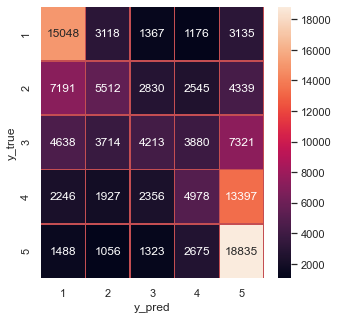

RESULTADOS TEST
              precision    recall  f1-score   support

           1       0.48      0.61      0.53      5961
           2       0.33      0.23      0.27      5605
           3       0.31      0.16      0.21      5941
           4       0.32      0.20      0.24      6226
           5       0.39      0.72      0.50      6344

    accuracy                           0.39     30077
   macro avg       0.37      0.38      0.35     30077
weighted avg       0.37      0.39      0.36     30077



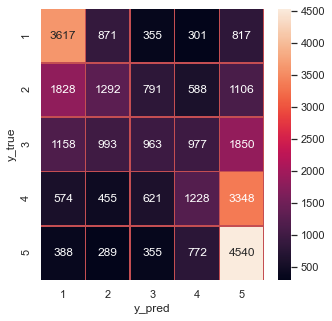

In [295]:
print('RESULTADOS TRAIN')
print(classification_report(y_train, y_train_pred))
confusion(y_train,y_train_pred)

print('RESULTADOS TEST')
print(classification_report(y_test, y_test_pred))
confusion(y_test,y_test_pred)

### P1. Random Forest Classifier

In [296]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 30,max_depth=20,bootstrap=True,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=30, random_state=42)

In [297]:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

RESULTADOS TRAIN
              precision    recall  f1-score   support

           1       0.56      0.70      0.63     23844
           2       0.37      0.37      0.37     22417
           3       0.40      0.36      0.38     23766
           4       0.47      0.38      0.42     24904
           5       0.57      0.60      0.58     25377

    accuracy                           0.48    120308
   macro avg       0.47      0.48      0.47    120308
weighted avg       0.48      0.48      0.48    120308



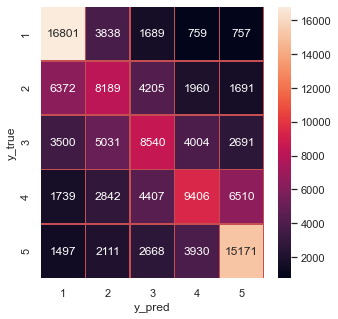

RESULTADOS TEST
              precision    recall  f1-score   support

           1       0.53      0.68      0.59      5961
           2       0.32      0.30      0.31      5605
           3       0.32      0.28      0.30      5941
           4       0.37      0.30      0.33      6226
           5       0.51      0.55      0.53      6344

    accuracy                           0.42     30077
   macro avg       0.41      0.42      0.41     30077
weighted avg       0.41      0.42      0.41     30077



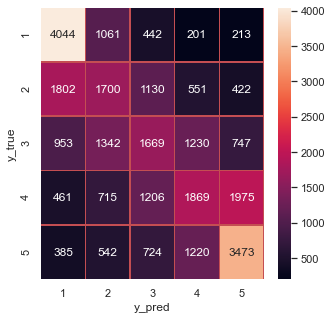

In [298]:
print('RESULTADOS TRAIN')
print(classification_report(y_train, y_train_pred_rf))
confusion(y_train,y_train_pred_rf)

print('RESULTADOS TEST')
print(classification_report(y_test, y_test_pred_rf))
confusion(y_test,y_test_pred_rf)

 - Aca podemos ver la importancia de los features que uso el modelo para clasificar

### P1. SVM

In [299]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(x_train,y_train)

LinearSVC(C=1)

In [300]:
y_train_pred_svm = svc.predict(x_train)
y_test_pred_svm = svc.predict(x_test)

RESULTADOS TRAIN
              precision    recall  f1-score   support

           1       0.56      0.72      0.63     23844
           2       0.41      0.33      0.36     22417
           3       0.40      0.31      0.35     23766
           4       0.43      0.35      0.39     24904
           5       0.54      0.68      0.60     25377

    accuracy                           0.48    120308
   macro avg       0.46      0.48      0.47    120308
weighted avg       0.47      0.48      0.47    120308



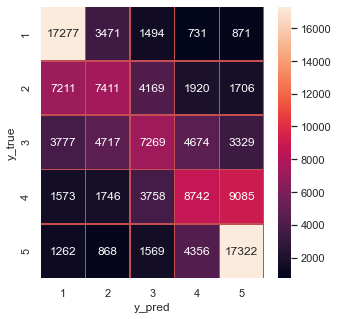

RESULTADOS TEST
              precision    recall  f1-score   support

           1       0.54      0.72      0.62      5961
           2       0.37      0.30      0.33      5605
           3       0.37      0.29      0.32      5941
           4       0.41      0.33      0.37      6226
           5       0.52      0.66      0.59      6344

    accuracy                           0.46     30077
   macro avg       0.44      0.46      0.45     30077
weighted avg       0.45      0.46      0.45     30077



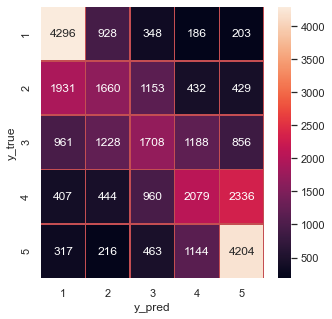

In [301]:
print('RESULTADOS TRAIN')
print(classification_report(y_train, y_train_pred_svm))
confusion(y_train,y_train_pred_svm)

print('RESULTADOS TEST')
print(classification_report(y_test, y_test_pred_svm))
confusion(y_test,y_test_pred_svm)

### P1. XGBoost

In [ ]:
pip install xgboost

In [100]:
import xgboost as xgb
from xgboost import XGBClassifier

clf_xgb = xgb.XGBClassifier(# objective='multi:softprob', 
                            # XGBoostError: bad allocation
                            objective= 'multi:softmax',# probemos usar este que es multi
                            # objective='binary:logistic',
                            # XGBoostError: [19:41:01] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/metric/rank_metric.cc:507: Check failed: preds.Size() == info.labels_.Size() (150385 vs. 30077) : label size predict size not match
                            #missing = 1, 
                            seed = 42,
                            #scale_pos_weight = 0.5, 
                            # { "scale_pos_weight" } might not be used.
                            subsample = 0.8
                           ,n_estimators = 100     )

# Buscando en interne se sugiere usar el parametro missing= 1 en lugar de missing = None
# https://stackoverflow.com/questions/67245147/getting-a-weird-error-when-trying-to-run-xgboost-predict-or-xgboost-score

In [101]:
clf_xgb.fit(x_train,
           y_train,
           verbose =True
           # early_stopping_rounds = 50,
           # eval_metric = 'aucpr',
           #eval_set=[(x_test,y_test)] # 
           )

[12:17:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

RESULTADOS TRAIN
              precision    recall  f1-score   support

           1       0.62      0.70      0.65     23844
           2       0.43      0.47      0.45     22417
           3       0.47      0.40      0.43     23766
           4       0.49      0.44      0.46     24904
           5       0.61      0.63      0.62     25377

    accuracy                           0.53    120308
   macro avg       0.52      0.53      0.52    120308
weighted avg       0.52      0.53      0.53    120308



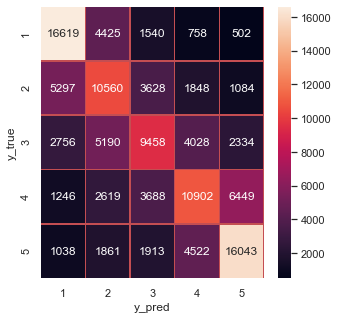

RESULTADOS TEST
              precision    recall  f1-score   support

           1       0.58      0.66      0.62      5961
           2       0.34      0.37      0.35      5605
           3       0.36      0.31      0.33      5941
           4       0.41      0.36      0.38      6226
           5       0.56      0.58      0.57      6344

    accuracy                           0.46     30077
   macro avg       0.45      0.46      0.45     30077
weighted avg       0.45      0.46      0.45     30077



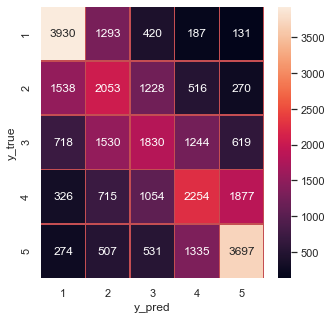

In [102]:
pred_y = clf_xgb.predict(x_test)
pred_y_train = clf_xgb.predict(x_train)

print('RESULTADOS TRAIN')
print(classification_report(y_train, pred_y_train))
confusion(y_train,pred_y_train)

print('RESULTADOS TEST')
print(classification_report(y_test, pred_y))
confusion(y_test,pred_y)

## RESULTADOS PRUEBA 1

#### TRAIN

In [110]:
resultados_P1_train = pd.read_excel('Resultados_P1.xlsx', sheet_name='TRAIN')
resultados_P1_train

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_2,Prec_3,Prec_4,Prec_5,rec_1,rec_2,rec_3,rec_4,rec_5,F1_1,F1_2,F1_3,F1_4,F1_5,Observaciones
0,M1,Prueba_1,NB_186,0.40,0.49,0.36,0.35,0.33,0.40,0.63,0.25,0.18,0.20,0.74,0.55,0.29,0.25,0.25,0.55,"Complicado para clasificar 1,2 y 3"
1,M2,Prueba_1,RF_186,0.48,0.56,0.37,0.40,0.47,0.57,0.70,0.37,0.36,0.38,0.60,0.63,0.37,0.38,0.42,0.58,"Complicado para clasificar 1,2 y 3 pero mejor ..."
2,M3,Prueba_1,SVM_186,0.48,0.56,0.41,0.40,0.43,0.54,0.72,0.33,0.31,0.35,0.68,0.63,0.36,0.35,0.39,0.60,Mejora las clasificaciones intermedias respect...
3,M4,Prueba_1,XGB_186,0.53,0.62,0.43,0.47,0.49,0.61,0.70,0.47,0.40,0.44,0.63,0.65,0.45,0.43,0.46,0.62,Modelo con Mejor accuracy y mejores métricas e...


#### TEST

In [111]:
resultados_P1_Test = pd.read_excel('Resultados_P1.xlsx', sheet_name='TEST')
resultados_P1_Test

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_2,Prec_3,Prec_4,Prec_5,rec_1,rec_2,rec_3,rec_4,rec_5,F1_1,F1_2,F1_3,F1_4,F1_5,Observaciones
0,M1,Prueba_1,NB_186,0.39,0.48,0.33,0.31,0.32,0.39,0.61,0.23,0.16,0.20,0.72,0.53,0.27,0.21,0.24,0.50,"Complicado para clasificar 1,2 y 3"
1,M2,Prueba_1,RF_186,0.42,0.53,0.32,0.32,0.37,0.51,0.68,0.30,0.28,0.30,0.55,0.59,0.31,0.30,0.33,0.53,"Complicado para clasificar 1,2 y 3 pero mejor ..."
2,M3,Prueba_1,SVM_186,0.46,0.54,0.37,0.37,0.41,0.52,0.72,0.30,0.29,0.33,0.66,0.62,0.33,0.32,0.37,0.59,"Mejor acuracy y clasificación de 1,2 y 3"
3,M4,Prueba_1,XGB_186,0.46,0.58,0.34,0.36,0.41,0.56,0.66,0.37,0.31,0.36,0.58,0.62,0.35,0.33,0.38,0.57,"Mejor acuracy y clasificación de 1,2 y 3"


## Conlusiones PRUEBA 1
Detalles: Correr los 3 modelos del Proyecto 3 más XGBoost para el data frame Amazon_train con reviews cuyo largo es igual o menor a 186 caracteres

Se ejecutan los 4 modelos mencionados. En el modelo que se nota una diferencia importante respecto al 'Proyecto 3' es el el RF que baja de gran manera su nivel de overfiting entre train y test. 

Por otro lado el mejor modelo del 'Proyecto 3' que fue el SVM sigue siendo el mejor en esta prueba 1 del  'Proyecto 4'. 
  - Accuracy Proyecto 3 => 0.50 y 0.46
  - Accuracy Proyecto 4 en P1 => 0.48 y 0.46
  
Luego de esto no se ven mejoras de peso respecto a los resultados del 'proyecto 3' al trabajar con un data set reducido (largo de las reviews menor igual a 186 caracteres)

Lo que si se puede apreciar que el nuevo modelo utilizado => XGBoost iguala en terminos de accuracy al SVM que en el 'proyecto 3' había sido el modelo con mejores métricas. Igualmente de la comparación de las metricas de ambos modelos se interpreta que el SVM es mejor en terminos de overfiting. Dicho esto para Prueba_2 y Prueba_3 vamos a útilizar

   - SVM

###  PRUEBA_2
Detalles:  Correr el modelo que mejor performe en el punto 1 pero para las 3 categorías de producto más relevantes

 - Home
 - Wireless
 - Toys

#### Vectorización - HOME

In [316]:
#Filtramos del set de datos => Amazon_train por categoría 'home'

Amazon_train_home=Amazon_train[Amazon_train.category=='home']

In [ ]:
Amazon_train_home.head()

In [320]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_B_home=TfidfVectorizer(max_features=1000, min_df= 5) # stop_words="english" , ngram_range=(1, 2)

In [321]:
vectorizer_B_home

TfidfVectorizer(max_features=1000, min_df=5)

In [322]:
vector_b_home= list(Amazon_train_home['body_stem'].values)
stars_b_home = Amazon_train_home['stars']

In [323]:
matriz_body_home = vectorizer_B_home.fit_transform(vector_b_home)

# Tomamos las palabras
all_words_b_home = vectorizer_B_home.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words_b_home[0:50])

50 palabras mas usadas:  ['abaj', 'abiert', 'abre', 'abrig', 'abrir', 'abrirl', 'absolut', 'acab', 'accesori', 'aceit', 'acept', 'acer', 'acert', 'aciert', 'aconsej', 'acord', 'adapt', 'adecu', 'adem', 'adhes', 'adorn', 'afil', 'agarr', 'agrad', 'agu', 'aguant', 'aguj', 'agujer', 'ahor', 'ahorr', 'air', 'ajust', 'alarm', 'algod', 'algui', 'algun', 'aliment', 'almacen', 'almacenaj', 'almoh', 'alta', 'alto', 'altur', 'alumbr', 'alumini', 'amarill', 'amazon', 'ambient', 'amig', 'amos']


#### Vectorización - Wireless

In [324]:
#Filtramos del set de datos => Amazon_train por categoría 'wireless'

Amazon_train_wireless=Amazon_train[Amazon_train.category=='wireless']

In [341]:
Amazon_train_wireless.shape

(18719, 6)

In [326]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_B_wire=TfidfVectorizer(max_features=1000, min_df= 5) # stop_words="english" , ngram_range=(1, 2)

In [327]:
vectorizer_B_wire

TfidfVectorizer(max_features=1000, min_df=5)

In [328]:
vector_b_wire= list(Amazon_train_wireless['body_stem'].values)
stars_b_wire = Amazon_train_wireless['stars']

In [329]:
matriz_body_wire = vectorizer_B_wire.fit_transform(vector_b_wire)

# Tomamos las palabras
all_words_b_wire = vectorizer_B_wire.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words_b_wire[0:50])

50 palabras mas usadas:  ['abaj', 'abiert', 'abre', 'abril', 'abrir', 'abrirl', 'absolut', 'abult', 'acab', 'acces', 'accesori', 'acept', 'aconsej', 'acopl', 'acord', 'acostumbr', 'activ', 'actualiz', 'adapt', 'adecu', 'adem', 'adher', 'adherent', 'adhes', 'adhier', 'adquir', 'afect', 'afloj', 'agarr', 'agot', 'agrad', 'agriet', 'agu', 'aguant', 'agujer', 'ahor', 'ahorr', 'air', 'ajust', 'alcanc', 'algui', 'algun', 'almacen', 'alrededor', 'alta', 'altavoc', 'altavoz', 'alto', 'altur', 'amarill']


#### Vectorización - Toy

In [334]:
#Filtramos del set de datos => Amazon_train por categoría 'toys'

Amazon_train_toy=Amazon_train[Amazon_train.category=='toy']

In [340]:
Amazon_train_toy.shape

(10691, 6)

In [336]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_B_toy=TfidfVectorizer(max_features=1000, min_df= 5) # stop_words="english" , ngram_range=(1, 2)

In [337]:
vectorizer_B_toy

TfidfVectorizer(max_features=1000, min_df=5)

In [338]:
vector_b_toy= list(Amazon_train_toy['body_stem'].values)
stars_b_toy = Amazon_train_toy['stars']

In [339]:
matriz_body_toy = vectorizer_B_toy.fit_transform(vector_b_toy)

# Tomamos las palabras
all_words_b_toy = vectorizer_B_toy.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words_b_toy[0:50])

50 palabras mas usadas:  ['abaj', 'abiert', 'aboll', 'abon', 'abre', 'abrir', 'abrirl', 'absolut', 'aburr', 'acab', 'accesori', 'acept', 'acert', 'aciert', 'aconsej', 'acopl', 'acord', 'activ', 'adapt', 'adecu', 'adem', 'ador', 'adorn', 'adult', 'agarr', 'agrad', 'agu', 'aguant', 'agujer', 'ahor', 'air', 'ajust', 'alas', 'algui', 'algun', 'alta', 'alto', 'alucin', 'amarill', 'amazon', 'amig', 'amos', 'ampli', 'andar', 'anill', 'animal', 'anterior', 'antigu', 'anul', 'anunci']


#### MODELO - SVM - PRUEBA 2 - Home

In [352]:
x_M2_home = matriz_body_home.toarray() # esto nos tranforma el data set a una lista / arreglo
y_M2_home = Amazon_train_home['stars']

In [353]:
from sklearn.model_selection import train_test_split
x_M2_home_train, x_M2_home_test, y_M2_home_train, y_M2_home_test = train_test_split(x_M2_home,y_M2_home,test_size=0.2,random_state=42,stratify=y_M2_home)

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

#Codgo para dar formato a la matriz
def confusion(y_M2_home_test,y_M2_home_pred):
    names=['1','2','3','4','5']
    cm=confusion_matrix(y_M2_home_test,y_M2_home_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [354]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(x_M2_home_train,y_M2_home_train)

LinearSVC(C=1)

In [355]:
y_M2_home_train_pred = svc.predict(x_M2_home_train)
y_M2_home_test_pred = svc.predict(x_M2_home_test)

RESULTADOS TRAIN
              precision    recall  f1-score   support

           1       0.62      0.73      0.67      3312
           2       0.50      0.47      0.49      3258
           3       0.49      0.41      0.45      3372
           4       0.50      0.43      0.46      3373
           5       0.58      0.70      0.63      3348

    accuracy                           0.55     16663
   macro avg       0.54      0.55      0.54     16663
weighted avg       0.54      0.55      0.54     16663



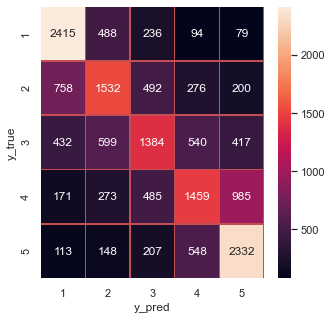

RESULTADOS TEST
              precision    recall  f1-score   support

           1       0.55      0.65      0.60       828
           2       0.34      0.32      0.33       815
           3       0.38      0.33      0.35       843
           4       0.39      0.33      0.36       843
           5       0.54      0.64      0.58       837

    accuracy                           0.45      4166
   macro avg       0.44      0.45      0.44      4166
weighted avg       0.44      0.45      0.44      4166



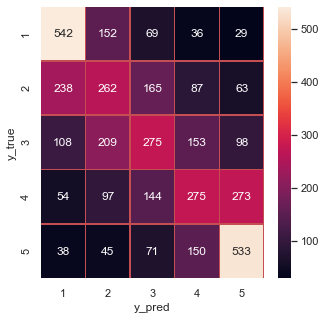

In [357]:
print('RESULTADOS TRAIN')
print(classification_report(y_M2_home_train, y_M2_home_train_pred))
confusion(y_M2_home_train, y_M2_home_train_pred)

print('RESULTADOS TEST')
print(classification_report(y_M2_home_test, y_M2_home_test_pred))
confusion(y_M2_home_test, y_M2_home_test_pred)

#### MODELO - SVM - PRUEBA 2 - wireless

In [359]:
x_M2_wire = matriz_body_wire.toarray() # esto nos tranforma el data set a una lista / arreglo
y_M2_wire = Amazon_train_wireless['stars']

In [360]:
from sklearn.model_selection import train_test_split
x_M2_wire_train, x_M2_wire_test, y_M2_wire_train, y_M2_wire_test = train_test_split(x_M2_wire,y_M2_wire,test_size=0.2,random_state=42,stratify=y_M2_wire)

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

#Codgo para dar formato a la matriz
def confusion(y_M2_wire_test,y_M2_wire_pred):
    names=['1','2','3','4','5']
    cm=confusion_matrix(y_M2_wire_test,y_M2_wire_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [361]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(x_M2_wire_train,y_M2_wire_train)

LinearSVC(C=1)

In [362]:
y_M2_wire_train_pred = svc.predict(x_M2_wire_train)
y_M2_wire_test_pred = svc.predict(x_M2_wire_test)

RESULTADOS TRAIN
              precision    recall  f1-score   support

           1       0.62      0.77      0.69      3629
           2       0.50      0.46      0.48      3084
           3       0.48      0.32      0.38      2709
           4       0.51      0.46      0.48      2770
           5       0.60      0.69      0.64      2783

    accuracy                           0.55     14975
   macro avg       0.54      0.54      0.53     14975
weighted avg       0.54      0.55      0.54     14975



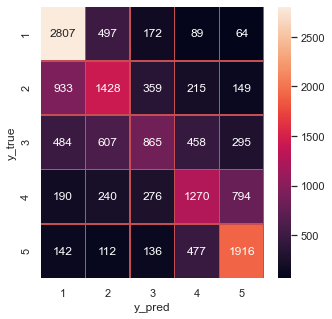

RESULTADOS TEST
              precision    recall  f1-score   support

           1       0.56      0.69      0.62       908
           2       0.37      0.34      0.35       771
           3       0.32      0.21      0.26       677
           4       0.38      0.34      0.36       692
           5       0.51      0.60      0.56       696

    accuracy                           0.45      3744
   macro avg       0.43      0.44      0.43      3744
weighted avg       0.43      0.45      0.44      3744



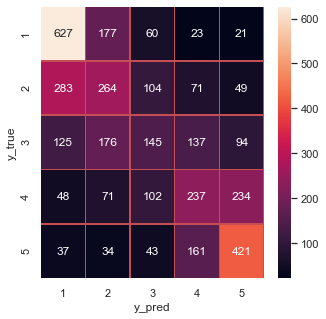

In [363]:
print('RESULTADOS TRAIN')
print(classification_report(y_M2_wire_train, y_M2_wire_train_pred))
confusion(y_M2_wire_train, y_M2_wire_train_pred)

print('RESULTADOS TEST')
print(classification_report(y_M2_wire_test, y_M2_wire_test_pred))
confusion(y_M2_wire_test, y_M2_wire_test_pred)

#### MODELO - SVM - PRUEBA 2 - Toy

In [364]:
x_M2_toy = matriz_body_toy.toarray() # esto nos tranforma el data set a una lista / arreglo
y_M2_toy = Amazon_train_toy['stars']

In [365]:
from sklearn.model_selection import train_test_split
x_M2_toy_train, x_M2_toy_test, y_M2_toy_train, y_M2_toy_test = train_test_split(x_M2_toy,y_M2_toy,test_size=0.2,random_state=42,stratify=y_M2_toy)

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

#Codgo para dar formato a la matriz
def confusion(y_M2_toy_test,y_M2_toy_pred):
    names=['1','2','3','4','5']
    cm=confusion_matrix(y_M2_toy_test,y_M2_toy_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [366]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(x_M2_toy_train,y_M2_toy_train)

LinearSVC(C=1)

In [367]:
y_M2_toy_train_pred = svc.predict(x_M2_toy_train)
y_M2_toy_test_pred = svc.predict(x_M2_toy_test)

RESULTADOS TRAIN
              precision    recall  f1-score   support

           1       0.69      0.75      0.72      1465
           2       0.58      0.55      0.56      1600
           3       0.56      0.55      0.55      1830
           4       0.59      0.45      0.51      1701
           5       0.64      0.78      0.70      1956

    accuracy                           0.62      8552
   macro avg       0.61      0.61      0.61      8552
weighted avg       0.61      0.62      0.61      8552



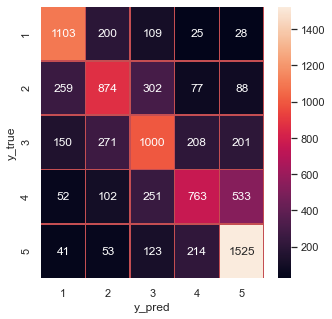

RESULTADOS TEST
              precision    recall  f1-score   support

           1       0.53      0.56      0.54       367
           2       0.34      0.33      0.33       400
           3       0.35      0.35      0.35       458
           4       0.34      0.25      0.29       425
           5       0.54      0.66      0.60       489

    accuracy                           0.43      2139
   macro avg       0.42      0.43      0.42      2139
weighted avg       0.42      0.43      0.43      2139



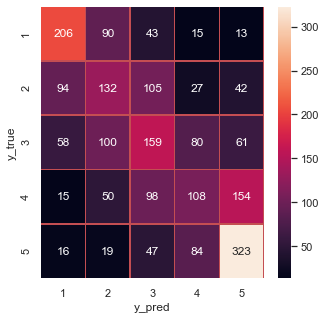

In [368]:
print('RESULTADOS TRAIN')
print(classification_report(y_M2_toy_train, y_M2_toy_train_pred))
confusion(y_M2_toy_train, y_M2_toy_train_pred)

print('RESULTADOS TEST')
print(classification_report(y_M2_toy_test, y_M2_toy_test_pred))
confusion(y_M2_toy_test, y_M2_toy_test_pred)

## RESULTADOS PRUEBA 2

#### TRAIN

In [376]:
resultados_P2_train = pd.read_excel('Resultados_P2.xlsx', sheet_name='TRAIN')
resultados_P2_train

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_2,Prec_3,Prec_4,Prec_5,rec_1,rec_2,rec_3,rec_4,rec_5,F1_1,F1_2,F1_3,F1_4,F1_5,Observaciones
0,5,Prueba_2,M1_Home_186,0.55,0.32,0.50,0.49,0.50,0.58,0.73,0.47,0.41,0.43,0.63,0.67,0.49,0.45,0.46,0.63,"Mejora las métricas de M1, M2, M3 y M4"
1,6,Prueba_2,M1_Wireless_186,0.55,0.62,0.50,0.48,0.51,0.60,0.77,0.46,0.32,0.46,0.69,0.69,0.48,0.38,0.48,0.64,"Mejora las métricas de M1, M2, M3 y M4"
2,7,Prueba_2,M1_toy_186,0.62,0.69,0.58,0.56,0.59,0.64,0.75,0.55,0.55,0.45,0.78,0.72,0.56,0.55,0.51,0.71,"Mejora las métricas de M1, M2, M3 y M4"


#### TEST

In [377]:
resultados_P2_test = pd.read_excel('Resultados_P2.xlsx', sheet_name='TEST')
resultados_P2_test

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_2,Prec_3,Prec_4,Prec_5,rec_1,rec_2,rec_3,rec_4,rec_5,F1_1,F1_2,F1_3,F1_4,F1_5,Observaciones
0,5,Prueba_2,M1_Home_186,0.45,0.55,0.34,0.38,0.39,0.54,0.65,0.32,0.33,0.33,0.64,0.60,0.33,0.35,0.36,0.58,Parece caer en overfiting por la caída del acc...
1,6,Prueba_2,M1_Wireless_186,0.45,0.56,0.37,0.32,0.38,0.51,0.69,0.34,0.21,0.34,0.60,0.62,0.35,0.26,0.36,0.56,Parece caer en overfiting por la caída del acc...
2,7,Prueba_2,M1_toy_186,0.43,0.53,0.34,0.35,0.34,0.54,0.56,0.33,0.35,0.25,0.66,0.54,0.33,0.35,0.29,0.60,Parece caer en overfiting por la caída del acc...


## Conlusiones PRUEBA 2

Detalles:  Correr el modelo que mejor performe en el punto 1 pero para las 3 categorías de producto más relevantes

 - Home
 - Wireless
 - Toys
 
 Al llevar adelante la 'Prueba 2' para las tres categías selccionadas podemos ver que en train obtenemos mucho mejores métricas que los 4 modelos de la 'Prueba 1'. igualmente no llegamos a resultado muy satisfactorio al ejecutar el modelo para test donde vemos que las métricas de los modelos aplicados sobre las tres categorías principales cae dando lugar a concluir que existe overfiting. 

###  PRUEBA_3
Detalles: Correr el modelo que mejor performe en el punto 1 pero modificando el data set Amazon_train que en lugar de 5 posibles clasificaciones tenga tres. Esto lo hacemos para el set de datos con reviews de un largo menor o igual a 186 caracteres

Opción 1:

 - 1 => Negativo
 - 2, 3 y 4 => Neutro. Aca es donde hemos visto más cuesta al modelo diferenciar
 - 5 => Positivo

Opción 2

 - 1 y 2 => Negativo
 - 3 => Neutro
 - 4 y 5 => Positivo 

#### PRUEBA 3 - Opción 1: Data set 183

#### Armado del set

In [125]:
Amazon_train.head()

,stars,body,title,category,length,body_stem,stars_opcion1
0,1,nada bueno se me fue ka pantalla en menos de ...,television Nevir,electronics,94,buen pantall men mes recib respuest fabric,1
1,1,horrible nos tuvimos que comprar otro porque ...,Dinero tirado a la basura con esta compra,electronics,140,horribl compr sab ingl inform tic despu hor ca...,1
2,1,te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,117,oblig compr unidad lleg sol form reclam autent...,1
4,1,llega tarde y co la talla equivocada,Devuelto,shoes,36,lleg tard tall equivoc,1
5,1,jamás me llegó y el vendedor nunca contacto co...,Jamás me llegó,home,81,lleg vendedor nunc contact conmig pes intent vec,1


Genero nueva columna 'Stars_opcion1' donde aplico las siguientes condicoines

- Start=1 => 'Stars_opcion1' = 1
- Start=5 => 'Stars_opcion1' = 5
- Start= 2, 3 o 4 => 'Stars_opcion1' = 3


In [116]:
conditionlist = [
    (Amazon_train['stars'] == 1) ,
    (Amazon_train['stars'] == 5),
    (Amazon_train['stars'] == 2) | (Amazon_train['stars'] == 3) | (Amazon_train['stars'] == 4)]
choicelist = [1, 5, 3]
Amazon_train['stars_opcion1'] = np.select(conditionlist, choicelist, default='Not Specified')

Amazon_train.head(1)

,stars,body,title,category,length,body_stem,stars_opcion1
0,1,nada bueno se me fue ka pantalla en menos de ...,television Nevir,electronics,94,buen pantall men mes recib respuest fabric,1


In [119]:
#pasamos el tipo de dato de 'stars_nueva' de objeto a númerico
Amazon_train['stars_opcion1']=pd.to_numeric(Amazon_train['stars_opcion1'])

In [120]:
#verifico valores únicos
Amazon_train['stars_opcion1'].unique()

array([1, 3, 5], dtype=int64)

In [121]:
#Verifico tipo de datos transformados
Amazon_train.dtypes

stars             int64
body             object
title            object
category         object
length            int64
body_stem        object
stars_opcion1     int64
dtype: object

In [123]:
# cantidad de valores en las 3 nuevas categorías d eestrellas definidas
Amazon_train['stars_opcion1'].value_counts()

3    88859
5    31721
1    29805
Name: stars_opcion1, dtype: int64

In [124]:
Amazon_train.describe()

,stars,length,stars_opcion1
count,150385.000000,150385.000000,150385.000000
mean,3.046148,95.657007,3.025481
std,1.423978,45.674835,1.279005
min,1.000000,16.000000,1.000000
25%,2.000000,55.000000,3.000000
50%,3.000000,98.000000,3.000000
75%,4.000000,131.000000,3.000000
max,5.000000,186.000000,5.000000


#### MODELO - SVM - PRUEBA 3 - Opción 1 - Data set 183

In [187]:
x_M3_Op1 = matriz_body.toarray() # esto nos tranforma el data set a una lista / arreglo
y_M3_Op1 = Amazon_train['stars_opcion1']

In [188]:
from sklearn.model_selection import train_test_split
x_M3_Op1_train, x_M3_Op1_test, y_M3_Op1_train, y_M3_Op1_test = train_test_split(x_M3_Op1,y_M3_Op1,test_size=0.2,random_state=42,stratify=y_M3_Op1)

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

#Codgo para dar formato a la matriz
def confusion(y_M3_Op1_test,y_M3_Op1_pred):
    names=['1','3','5']
    cm=confusion_matrix(y_M3_Op1_test,y_M3_Op1_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [189]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(x_M3_Op1_train,y_M3_Op1_train)

LinearSVC(C=1)

In [190]:
y_M3_Op1_train_pred = svc.predict(x_M3_Op1_train)
y_M3_Op1_test_pred = svc.predict(x_M3_Op1_test)

RESULTADOS TRAIN
              precision    recall  f1-score   support

           1       0.72      0.49      0.59     23844
           3       0.70      0.87      0.78     71087
           5       0.67      0.41      0.51     25377

    accuracy                           0.70    120308
   macro avg       0.70      0.59      0.63    120308
weighted avg       0.70      0.70      0.68    120308



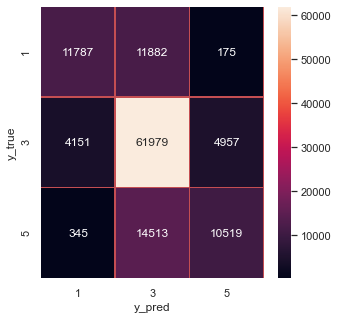

RESULTADOS TEST
              precision    recall  f1-score   support

           1       0.71      0.49      0.58      5961
           3       0.70      0.86      0.77     17772
           5       0.65      0.41      0.50      6344

    accuracy                           0.69     30077
   macro avg       0.69      0.59      0.62     30077
weighted avg       0.69      0.69      0.68     30077



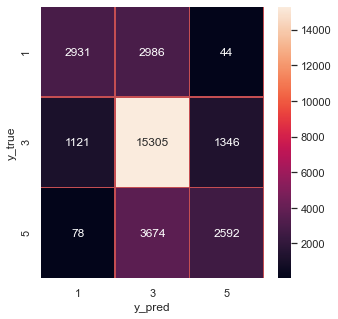

In [201]:
print('RESULTADOS TRAIN')
print(classification_report(y_M3_Op1_train, y_M3_Op1_train_pred))
confusion(y_M3_Op1_train, y_M3_Op1_train_pred)

print('RESULTADOS TEST')
print(classification_report(y_M3_Op1_test, y_M3_Op1_test_pred))
confusion(y_M3_Op1_test, y_M3_Op1_test_pred)

#### PRUEBA 3 - Opción 2: Data set 183

#### Armado del set

In [152]:
Amazon_train.head()

,stars,body,title,category,length,body_stem,stars_opcion1
0,1,nada bueno se me fue ka pantalla en menos de ...,television Nevir,electronics,94,buen pantall men mes recib respuest fabric,1
1,1,horrible nos tuvimos que comprar otro porque ...,Dinero tirado a la basura con esta compra,electronics,140,horribl compr sab ingl inform tic despu hor ca...,1
2,1,te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,117,oblig compr unidad lleg sol form reclam autent...,1
4,1,llega tarde y co la talla equivocada,Devuelto,shoes,36,lleg tard tall equivoc,1
5,1,jamás me llegó y el vendedor nunca contacto co...,Jamás me llegó,home,81,lleg vendedor nunc contact conmig pes intent vec,1


Genero nueva columna 'Stars_opcion2' donde aplico las siguientes condicoines

- Start=1 y 2 => 'Stars_opcion2' = 1
- Start=3 => 'Stars_opcion2' = 3
- Start= 4 y 5 => 'Stars_opcion2' = 5

In [159]:
conditionlist = [
    (Amazon_train['stars'] == 1) | (Amazon_train['stars'] == 2) ,
    (Amazon_train['stars'] == 3),
    (Amazon_train['stars'] == 4) | (Amazon_train['stars'] == 5)]
choicelist = [1, 3, 5]
Amazon_train['stars_opcion2'] = np.select(conditionlist, choicelist, default='Not Specified')

Amazon_train.head(1)

,stars,body,title,category,length,body_stem,stars_opcion1,stars_opcion2
0,1,nada bueno se me fue ka pantalla en menos de ...,television Nevir,electronics,94,buen pantall men mes recib respuest fabric,1,1


In [181]:
# verifico algunos casos de que el conditionalist funciona ok. 
Amazon_train[Amazon_train.stars==4].head()

,stars,body,title,category,length,body_stem,stars_opcion1,stars_opcion2
120000,4,tiene buena pinta veremos el resultado,Calidad,sports,39,buen pint ver result,3,5
120001,4,entrega rápida como siempre pero falta factura,Falta factura,wireless,46,entreg pid siempr falt factur,3,5
120002,4,está bien y envío rápido,Bueno,pc,24,bien pid,3,5
120003,4,queda muy bien material duradero y tamaño per...,Material duradero,home,51,qued bien material durader tam perfect,3,5
120004,4,genial aunque huele mucho a pegamento,Buena,personal_care_appliances,37,genial aunqu huel pegament,3,5


In [182]:
#pasamos el tipo de dato de 'stars_nueva' de objeto a númerico
Amazon_train['stars_opcion2']=pd.to_numeric(Amazon_train['stars_opcion2'])

In [183]:
#verifico valores únicos
Amazon_train['stars_opcion2'].unique()

array([1, 3, 5], dtype=int64)

In [184]:
#Verifico tipo de datos transformados
Amazon_train.dtypes

stars             int64
body             object
title            object
category         object
length            int64
body_stem        object
stars_opcion1     int64
stars_opcion2     int64
dtype: object

In [185]:
# cantidad de valores en las 3 nuevas categorías d eestrellas definidas
Amazon_train['stars_opcion2'].value_counts()

5    62851
1    57827
3    29707
Name: stars_opcion2, dtype: int64

In [186]:
Amazon_train.describe()

,stars,length,stars_opcion1,stars_opcion2
count,150385.000000,150385.000000,150385.000000,150385.000000
mean,3.046148,95.657007,3.025481,3.066815
std,1.423978,45.674835,1.279005,1.790363
min,1.000000,16.000000,1.000000,1.000000
25%,2.000000,55.000000,3.000000,1.000000
50%,3.000000,98.000000,3.000000,3.000000
75%,4.000000,131.000000,3.000000,5.000000
max,5.000000,186.000000,5.000000,5.000000


#### MODELO - SVM - PRUEBA 3 - Opción 2 - Data set 183

In [193]:
x_M3_Op2 = matriz_body.toarray() # esto nos tranforma el data set a una lista / arreglo
y_M3_Op2 = Amazon_train['stars_opcion2']

In [194]:
from sklearn.model_selection import train_test_split
x_M3_Op2_train, x_M3_Op2_test, y_M3_Op2_train, y_M3_Op2_test = train_test_split(x_M3_Op2,y_M3_Op2,test_size=0.2,random_state=42,stratify=y_M3_Op2)

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

#Codgo para dar formato a la matriz
def confusion(y_M3_Op2_test,y_M3_Op2_pred):
    names=['1','3','5']
    cm=confusion_matrix(y_M3_Op2_test,y_M3_Op2_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [197]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(x_M3_Op2_train,y_M3_Op2_train)

LinearSVC(C=1)

In [198]:
y_M3_Op2_train_pred = svc.predict(x_M3_Op2_train)
y_M3_Op2_test_pred = svc.predict(x_M3_Op2_test)

RESULTADOS TRAIN
              precision    recall  f1-score   support

           1       0.68      0.84      0.75     46261
           3       0.47      0.09      0.15     23766
           5       0.72      0.84      0.77     50281

    accuracy                           0.69    120308
   macro avg       0.62      0.59      0.56    120308
weighted avg       0.65      0.69      0.64    120308



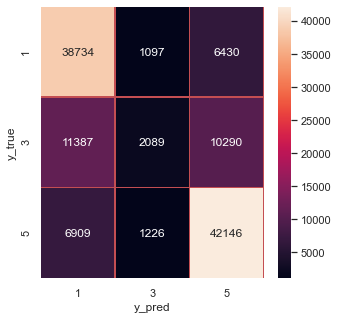

RESULTADOS TEST
              precision    recall  f1-score   support

           1       0.68      0.84      0.75     11566
           3       0.45      0.08      0.14      5941
           5       0.71      0.84      0.77     12570

    accuracy                           0.69     30077
   macro avg       0.61      0.58      0.55     30077
weighted avg       0.65      0.69      0.64     30077



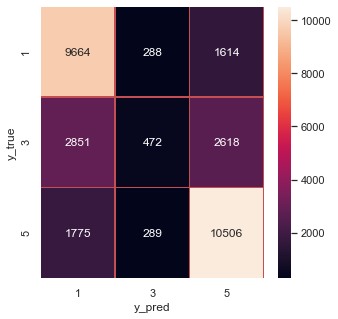

In [200]:
print('RESULTADOS TRAIN')
print(classification_report(y_M3_Op2_train, y_M3_Op2_train_pred))
confusion(y_M3_Op2_train, y_M3_Op2_train_pred)

print('RESULTADOS TEST')
print(classification_report(y_M3_Op2_test, y_M3_Op2_test_pred))
confusion(y_M3_Op2_test, y_M3_Op2_test_pred)

## RESULTADOS PRUEBA 3

#### TRAIN

In [370]:
resultados_P3_train_Op1 = pd.read_excel('Resultados_P3.xlsx', sheet_name='TRAIN_OP_1')
resultados_P3_train_Op1

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_3,Prec_5,rec_1,rec_3,rec_5,F1_1,F1_3,F1_5,Observaciones
0,M8,Prueba_3,M_SVM_OP_1_reclasif_183,0.7,0.72,0.7,0.67,0.49,0.87,0.41,0.59,0.78,0.51,Se observa mejoras en la estimación de valores...


In [371]:
resultados_P3_train_Op2 = pd.read_excel('Resultados_P3.xlsx', sheet_name='TRAIN_OP_2')
resultados_P3_train_Op2

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_3,Prec_5,rec_1,rec_3,rec_5,F1_1,F1_3,F1_5,Observaciones
0,M9,Prueba_3,M_SVM_OP_2_reclasif_183,0.69,0.68,0.47,0.72,0.84,0.09,0.84,0.75,0.15,0.77,Se observan resultado no satisfactorios en la ...


#### TEST

In [372]:
resultados_P3_TEST_Op1 = pd.read_excel('Resultados_P3.xlsx', sheet_name='TEST_OP_1')
resultados_P3_TEST_Op1

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_3,Prec_5,rec_1,rec_3,rec_5,F1_1,F1_3,F1_5,Observaciones
0,M8,Prueba_3,M_SVM_OP_1_reclasif_183,0.69,0.71,0.7,0.65,0.49,0.86,0.41,0.58,0.77,0.5,Se observa mejoras en la estimación de valores...


In [373]:
resultados_P3_test_Op2 = pd.read_excel('Resultados_P3.xlsx', sheet_name='TEST_OP_2')
resultados_P3_test_Op2

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_3,Prec_5,rec_1,rec_3,rec_5,F1_1,F1_3,F1_5,Observaciones
0,M9,Prueba_3,M_SVM_OP_2_reclasif_183,0.69,0.68,0.45,0.71,0.84,0.08,0.84,0.75,0.14,0.77,Se observan resultado no satisfactorios en la ...


## Conclusiones PRUEBA 3

Detalles: Correr el modelo que mejor performe en el punto 1 pero modificando el data set Amazon_train que en lugar de 5 posibles clasificaciones tenga tres. Esto lo hacemos para el set de datos con reviews de un largo menor o igual a 186 caracteres

En la 'opción 1' donde agrupamos los valores intermedios originales 2,3,4 bajo el valor 3 observamos mejoras sustanciales en las predicción de los valores intermedios y si bien los extremos bajan sobre todo en el F1 no es tan significativa esta bajada como la ganancia que se obtiene en los valores intermedios    

En la 'opción 2' donde agrupamos (1 y 2) => 1 , 3=>3 y (4 y 5) =>5, se ve una muy buena predicción en los extremos (la más alta lograda al momento) pero el valor medio cae abruptamente, por lo cual no se considera una opción a seguir explorando.  

## CONSLUSIÓN FINAL

Durante el presente trabajo se corrieron tres pruebas diferentes Prueba 1 / Prueba 2 / Prueba 3

 - Prueba 1 => 4 modelos diferentes => TOTAL 4 modelos
 - Pueba 2 => se selecciono el modelo que merjor performo en Prueba 1 y se uso el mismo para tres set de datos diferentes. Cada set correspondía a una categoría de producto diferente => TOTAL 3 modelos
 - Prueba 3 => se selecciono el modelo que merjor performo en Prueba 1 y se restructuro la manera de clasificar (asignar estrellas) en dos opciones previamente descriptas => => TOTAL 2 modelos
 
En total se corrieron y compararon las métricas de 9 modelos y concluímos que las mejores metricas y capacidad de predecir la tiene el modelo 8 => M8. 
 
M8 muestra el accuracy más elevado y en principio casi nulo overfiting al revisar las métricas del train y el test, por lo que la recomendación para poder mejorar las predicciones respecto al sistema de puntuación por estrellas sería aplicarle al mismo las siguientes modificaciones, 
 
     - Transformar el sistema de clasificaicón de 5 estrellas a uno de 3 estrellas o una clasificación descriptiva de 'Muy Bueno' / 'Bueno'/ 'Regular o malo'
     - No permitir reviews de largo mayor a 186 caracteres. 
 


**Métricas modelo M8**

In [381]:
resultados_P3_train_Op1

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_3,Prec_5,rec_1,rec_3,rec_5,F1_1,F1_3,F1_5,Observaciones
0,M8,Prueba_3,M_SVM_OP_1_reclasif_183,0.7,0.72,0.7,0.67,0.49,0.87,0.41,0.59,0.78,0.51,Se observa mejoras en la estimación de valores...


In [380]:
resultados_P3_TEST_Op1

,# Modelo,# Prueba,ID_Modelo,Accuracy,Prec_1,Prec_3,Prec_5,rec_1,rec_3,rec_5,F1_1,F1_3,F1_5,Observaciones
0,M8,Prueba_3,M_SVM_OP_1_reclasif_183,0.69,0.71,0.7,0.65,0.49,0.86,0.41,0.58,0.77,0.5,Se observa mejoras en la estimación de valores...
